In [1]:
options(warn=-1)
library(moments)  # skewness

In [2]:
# load the data set
data = read.csv('./data/loan.csv')
tmp = read.csv('./data/2016AllData.csv')

In [3]:
# change factor into numeric
tmp$int_rate = as.numeric(sub("%", "", tmp$int_rate))
tmp$revol_util = as.numeric(sub("%", "", tmp$revol_util))

# merge together
data = rbind(data, tmp)

In [4]:
# get brief information
head(data)
dim(data)

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,⋯,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 1321786      74

# transform y values

In [5]:
# change the loan status
default.y = c('Default', 'Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 
              'Does not meet the credit policy. Status:Charged Off')
data$loan_status = ifelse(data$loan_status %in% default.y, 1, 0)

# NA value

In [6]:
# compute the number of missing values in each column
num.NA = colSums(apply(data, 2, is.na))
data.type = sapply(data[, names(which(num.NA != 0))], class)
cbind(num.NA[num.NA > 0], data.type)

,,data.type
id,434407,integer
member_id,434407,integer
emp_title,1,factor
annual_inc,4,numeric
url,434407,factor
delinq_2yrs,29,numeric
inq_last_6mths,30,numeric
mths_since_last_delinq,659140,numeric
mths_since_last_record,1101820,numeric
open_acc,29,numeric


In [7]:
# drop columns that have too many missing values
drop.names = c("mths_since_last_delinq", "mths_since_last_record", "mths_since_last_major_derog", 
               "annual_inc_joint", "dti_joint", "open_acc_6m", "open_il_6m", "open_il_12m", 
               "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", 
               "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m")
data = data[, !(names(data) %in% drop.names)]
dim(data)

[1] 1321786      55

In [8]:
# compute the number of missing values in each column
num.NA = colSums(apply(data, 2, is.na))
data.type = sapply(data[, names(which(num.NA != 0))], class)
cbind(num.NA[num.NA > 0], data.type)

,,data.type
id,434407,integer
member_id,434407,integer
emp_title,1,factor
annual_inc,4,numeric
url,434407,factor
delinq_2yrs,29,numeric
inq_last_6mths,30,numeric
open_acc,29,numeric
pub_rec,29,numeric
revol_util,766,numeric


In [9]:
# feature is "" (missing value, but not NA)
for (i in names(data))
    cat(i, '\t', sum(data[, i] == ""), '\n')

id 	 NA 
member_id 	 NA 
loan_amnt 	 0 
funded_amnt 	 0 
funded_amnt_inv 	 0 
term 	 0 
int_rate 	 0 
installment 	 0 
grade 	 0 
sub_grade 	 0 
emp_title 	 NA 
emp_length 	 0 
home_ownership 	 0 
annual_inc 	 NA 
verification_status 	 0 
issue_d 	 0 
loan_status 	 0 
pymnt_plan 	 0 
url 	 NA 
desc 	 1195734 
purpose 	 0 
title 	 23324 
zip_code 	 0 
addr_state 	 0 
dti 	 0 
delinq_2yrs 	 NA 
earliest_cr_line 	 29 
inq_last_6mths 	 NA 
open_acc 	 NA 
pub_rec 	 NA 
revol_bal 	 0 
revol_util 	 NA 
total_acc 	 NA 
initial_list_status 	 0 
out_prncp 	 0 
out_prncp_inv 	 0 
total_pymnt 	 0 
total_pymnt_inv 	 0 
total_rec_prncp 	 0 
total_rec_int 	 0 
total_rec_late_fee 	 0 
recoveries 	 0 
collection_recovery_fee 	 0 
last_pymnt_d 	 18203 
last_pymnt_amnt 	 0 
next_pymnt_d 	 296259 
last_credit_pull_d 	 78 
collections_12_mths_ex_med 	 NA 
policy_code 	 0 
application_type 	 0 
verification_status_joint 	 1312486 
acc_now_delinq 	 NA 
tot_coll_amt 	 NA 
tot_cur_bal 	 NA 
total_rev_hi_lim 	 

# Transform categorical feature into numerical feature

In [10]:
data$sub_grade = as.numeric(data$sub_grade)

# Drop useless features

In [11]:
# drop useless categorical features
drop.names = c("emp_title", "issue_d", "pymnt_plan", "url", "desc", "title", "zip_code", "addr_state", 
               "earliest_cr_line", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d", "application_type", 
               "verification_status_joint", "grade")
data = data[, !(names(data) %in% drop.names)]
dim(data)

[1] 1321786      40

In [12]:
# drop useless numerical features
drop.names = c("id", "member_id", "policy_code")
data = data[, !(names(data) %in% drop.names)]
dim(data)

[1] 1321786      37

# Data Structure

In [13]:
# find all categorical and numerical variables
data.type = sapply(data, class)
cat.var = names(data)[which(data.type == 'factor')]
num.var = names(data)[which((data.type == 'integer') | (data.type == 'numeric'))]

In [14]:
# get the details of unique values of categorical variable
for (i in cat.var) {
    cat(i, '\t', length(unique(data[, i])), '\n')
}

term 	 2 
emp_length 	 12 
home_ownership 	 6 
verification_status 	 3 
purpose 	 14 
initial_list_status 	 2 


In [15]:
# get the details of unique values of numerical variable
for (i in num.var) {
    cat(i, '\t', length(unique(data[, i])), '\n')
}

loan_amnt 	 1545 
funded_amnt 	 1545 
funded_amnt_inv 	 10041 
int_rate 	 593 
installment 	 79746 
sub_grade 	 35 
annual_inc 	 64334 
loan_status 	 2 
dti 	 5573 
delinq_2yrs 	 30 
inq_last_6mths 	 29 
open_acc 	 86 
pub_rec 	 41 
revol_bal 	 85185 
revol_util 	 1387 
total_acc 	 144 
out_prncp 	 359182 
out_prncp_inv 	 384042 
total_pymnt 	 653484 
total_pymnt_inv 	 649186 
total_rec_prncp 	 333599 
total_rec_int 	 363239 
total_rec_late_fee 	 6831 
recoveries 	 23877 
collection_recovery_fee 	 21575 
last_pymnt_amnt 	 275730 
collections_12_mths_ex_med 	 17 
acc_now_delinq 	 9 
tot_coll_amt 	 12937 
tot_cur_bal 	 395503 
total_rev_hi_lim 	 27407 


# Fill NA values

In [16]:
# create new feature named "NA" for categorical variables
for (i in cat.var) {
    data[, i] = addNA(data[, i])
}

In [17]:
# create new feature using the median value for numerical variables
for (i in num.var) {
    na.id = is.na(data[, i])
    tmp.median = median(data[, i], na.rm=TRUE)
    data[which(na.id), i] = tmp.median
}

In [18]:
# compute the number of missing values in each column
num.NA = colSums(apply(data, 2, is.na))
sum(num.NA)

[1] 0

# Skewness

In [19]:
# skewness
skewed.features = sapply(data[, num.var], skewness)
skewed.features = num.var[which(skewed.features > 0.75)]
skewed.features

[1] "installment"                "annual_inc"                
 [3] "loan_status"                "dti"                       
 [5] "delinq_2yrs"                "inq_last_6mths"            
 [7] "open_acc"                   "pub_rec"                   
 [9] "revol_bal"                  "total_acc"                 
[11] "out_prncp"                  "out_prncp_inv"             
[13] "total_pymnt"                "total_pymnt_inv"           
[15] "total_rec_prncp"            "total_rec_int"             
[17] "total_rec_late_fee"         "recoveries"                
[19] "collection_recovery_fee"    "last_pymnt_amnt"           
[21] "collections_12_mths_ex_med" "acc_now_delinq"            
[23] "tot_coll_amt"               "tot_cur_bal"               
[25] "total_rev_hi_lim"

In [20]:
skew = c('installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 
         'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
         'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal',
         'total_rev_hi_lim')

In [21]:
for (i in skew)
    data[, i] = log(data[, i] + 1)

### Plot of categorical variable

In [22]:
str(data[, cat.var])

'data.frame':	1321786 obs. of  6 variables:
 $ term               : Factor w/ 3 levels " 36 months"," 60 months",..: 1 2 1 1 2 1 2 1 2 2 ...
 $ emp_length         : Factor w/ 13 levels "< 1 year","1 year",..: 3 1 3 3 2 5 10 11 6 1 ...
 $ home_ownership     : Factor w/ 7 levels "ANY","MORTGAGE",..: 6 6 6 6 6 6 6 6 5 6 ...
 $ verification_status: Factor w/ 4 levels "Not Verified",..: 3 2 1 2 2 2 1 2 2 3 ...
 $ purpose            : Factor w/ 15 levels "car","credit_card",..: 2 1 12 10 10 14 3 1 12 10 ...
 $ initial_list_status: Factor w/ 3 levels "f","w",NA: 1 1 1 1 1 1 1 1 1 1 ...


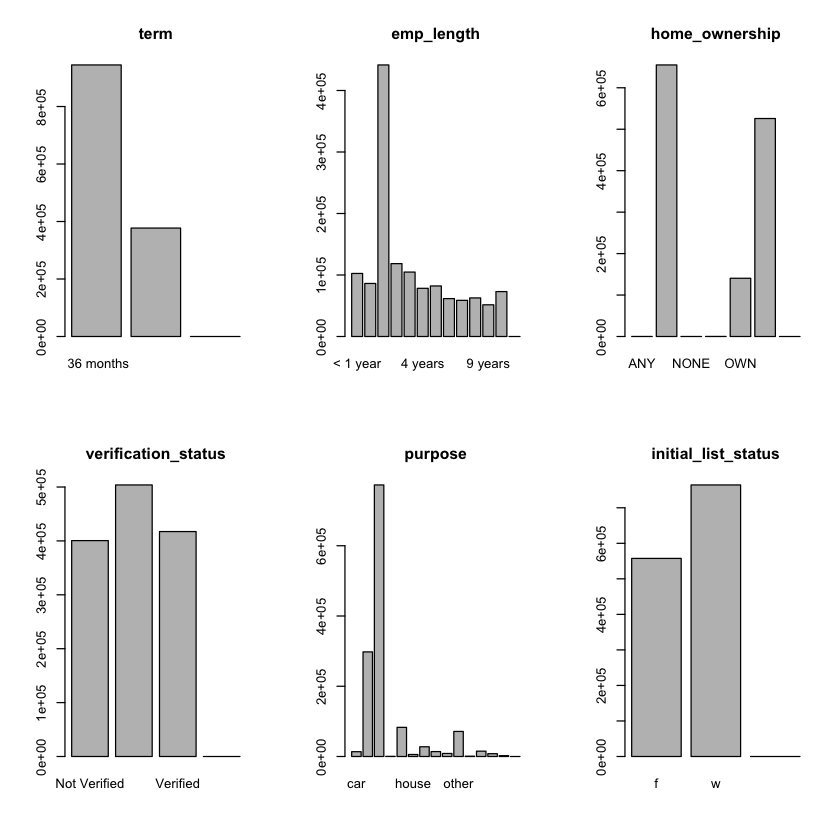

In [23]:
# plot the categorical variable distribution
par(mfrow=c(2, 3))
for (i in 1:6) {
    barplot(table(data[, cat.var[i]]), main=cat.var[i])
}

### Plot of numerical variables

In [24]:
str(data[, num.var])

'data.frame':	1321786 obs. of  31 variables:
 $ loan_amnt                 : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt               : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt_inv           : num  4975 2500 2400 10000 3000 ...
 $ int_rate                  : num  10.7 15.3 16 13.5 12.7 ...
 $ installment               : num  5.1 4.11 4.45 5.83 4.23 ...
 $ sub_grade                 : num  7 14 15 11 10 4 15 21 27 10 ...
 $ annual_inc                : num  10.09 10.31 9.41 10.8 11.29 ...
 $ loan_status               : num  0 1 0 0 0 0 0 0 1 1 ...
 $ dti                       : num  3.355 0.693 2.274 3.045 2.941 ...
 $ delinq_2yrs               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ inq_last_6mths            : num  1 5 2 1 0 3 1 2 2 0 ...
 $ open_acc                  : num  3 3 2 10 15 9 7 4 11 2 ...
 $ pub_rec                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ revol_bal                 : num  9.52 7.43 7.99 8.63 10.23 ...
 $ revol_util                : num  83.7 9.4 98.5 21 53

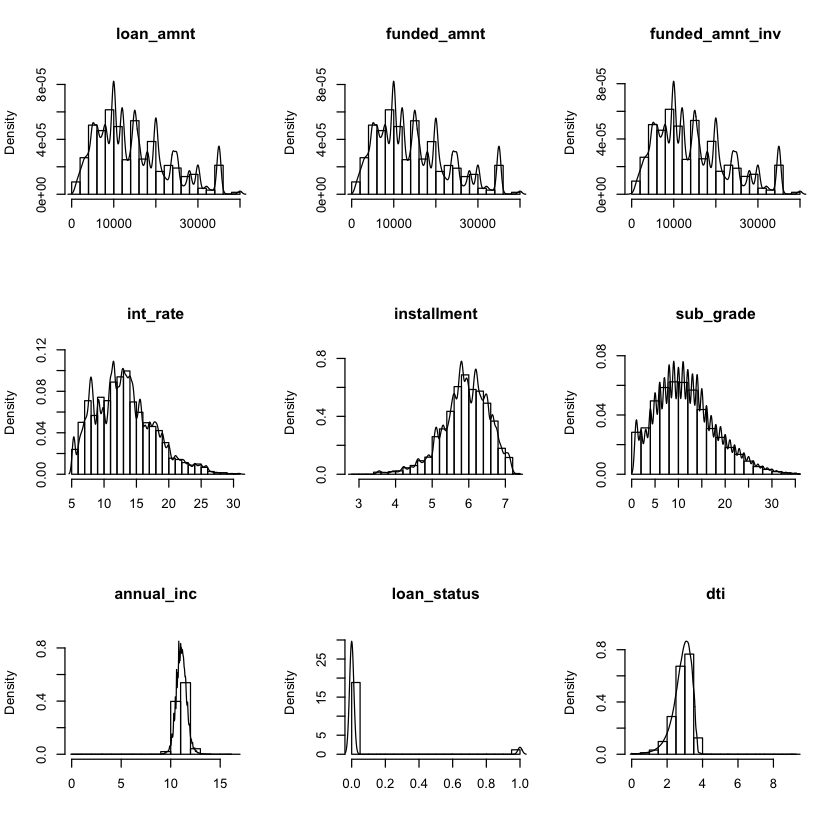

In [25]:
par(mfrow = c(3, 3))
for(i in 1:9){
    dist = density(data[, num.var[i]])
    hist(data[, num.var[i]], main=num.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}

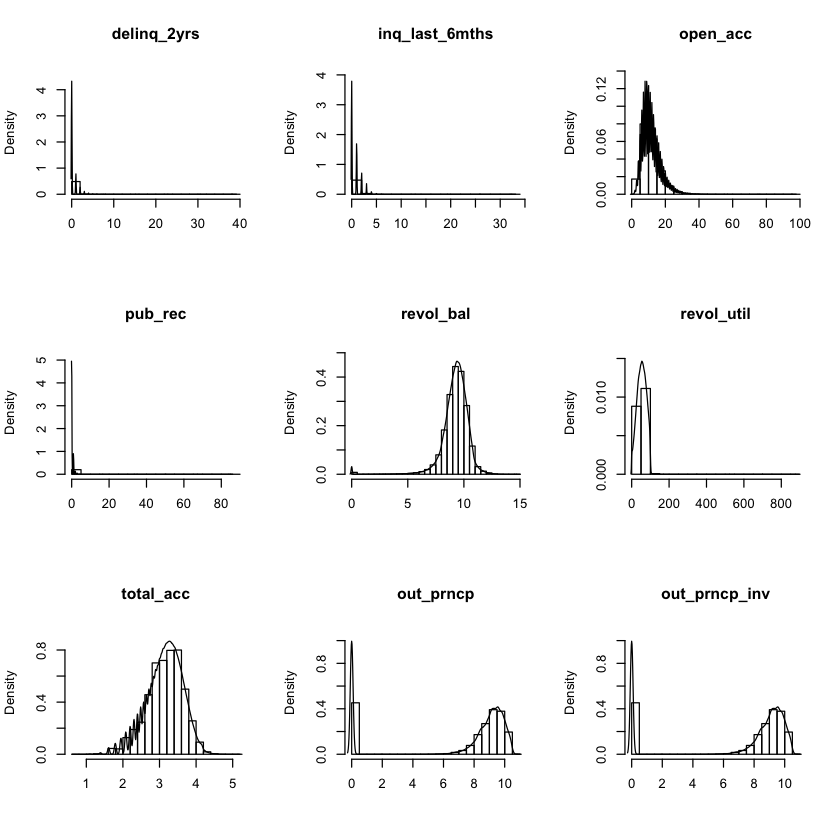

In [26]:
par(mfrow = c(3, 3))
for(i in 10:18){
    dist = density(data[, num.var[i]])
    hist(data[, num.var[i]], main=num.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}

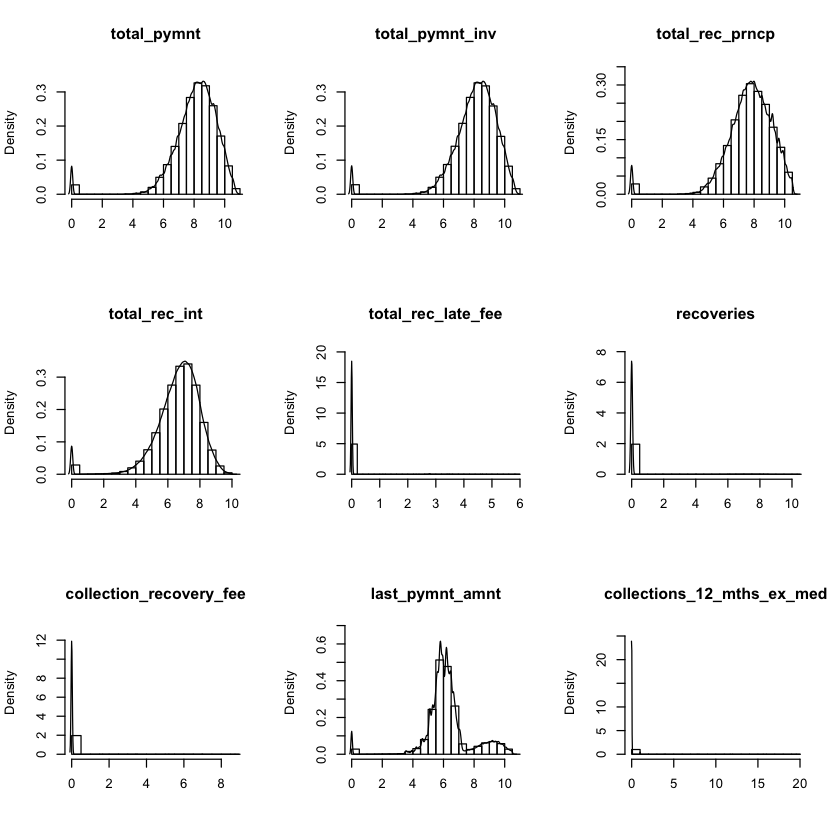

In [27]:
par(mfrow = c(3, 3))
for(i in 19:27){
    dist = density(data[, num.var[i]])
    hist(data[, num.var[i]], main=num.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}

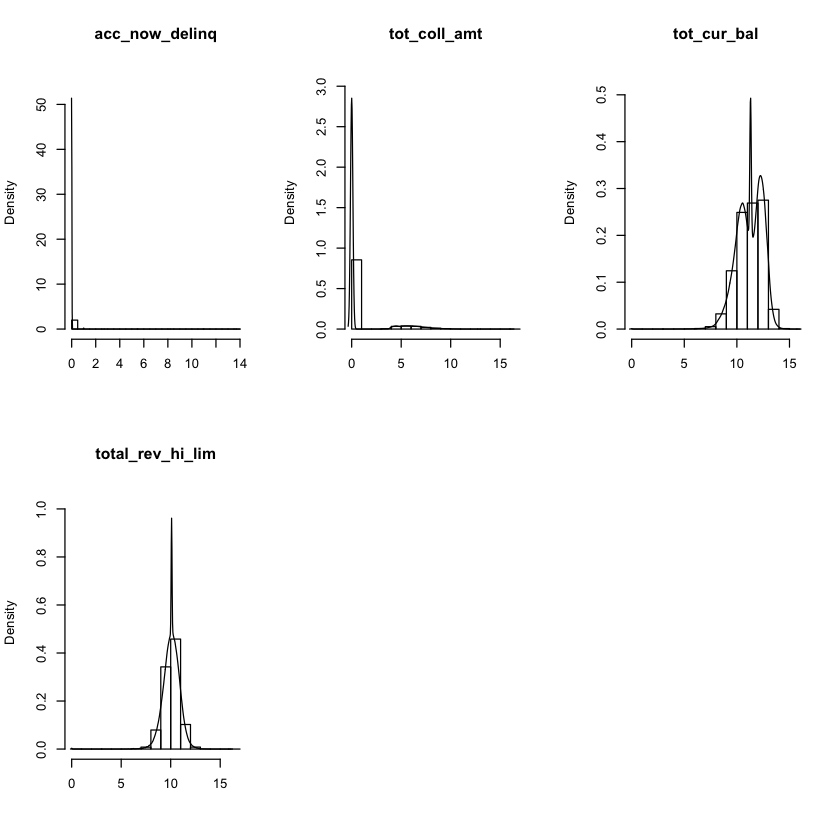

In [28]:
par(mfrow = c(2, 3))
for(i in 28:31){
    dist = density(data[, num.var[i]])
    hist(data[, num.var[i]], main=num.var[i], xlab='', prob=TRUE, ylim=c(0, max(dist$y) * 1.1))
    lines(dist)
}